In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

panss_p_n = pd.read_csv('panss_p_n.csv')

#数据全部转换为float64
panss_p_n = panss_p_n.astype('float64')

#定位缺失值
for columname in panss_p_n.columns:
    if panss_p_n[columname].count() != len(panss_p_n):
        loc = panss_p_n[columname][panss_p_n[columname].isnull().values==True].index.tolist()
        print(columname, loc)

#以中位数替换缺失值
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values='NaN', strategy = 'median', axis=0)
imp.fit(panss_p_n)
Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)
panss_p_n_imputed = imp.transform(panss_p_n)


#标准化数据进行后续操作
panss_p_n_imputed_mean = np.mean(panss_p_n_imputed, axis=0)
panss_p_n_imputed_std = np.std(panss_p_n_imputed, axis=0)
panss_p_n_imputed_standardized = preprocessing.scale(panss_p_n_imputed)


#进行KMean
from sklearn import cluster, metrics

kmeans_fit = cluster.KMeans(n_clusters = 4).fit(panss_p_n_imputed_standardized)
cluster_labels = kmeans_fit.labels_
cluster_centers = kmeans_fit.cluster_centers_

cluster_centers_not_imputed=cluster_centers * panss_p_n_imputed_std+panss_p_n_imputed_mean

print cluster_centers_not_imputed

panss_p_n_imputed_with_label = pd.DataFrame(panss_p_n_imputed, 
                                            columns=panss_p_n.columns)
panss_p_n_imputed_with_label['kmeans_label'] = cluster_labels

from collections import Counter
Counter(cluster_labels)

('panss_n1', [108])
('panss_n3', [584])
[[5.13020833 4.04166667 3.99479167 3.70833333 2.99479167 4.96875
  3.94270833 2.22916667 2.16666667 2.625      2.35416667 2.07291667
  2.09895833 1.83854167]
 [2.112      2.576      1.584      1.4        1.344      2.032
  1.808      4.4        4.432      4.264      4.484      4.04
  4.204      3.292     ]
 [5.83333333 5.07142857 5.03571429 4.69047619 3.63095238 5.97619048
  4.94047619 4.88095238 4.97619048 5.5952381  5.5        4.89285714
  5.72619048 3.67857143]
 [2.64533333 2.37066667 1.81333333 1.63466667 1.43733333 2.592
  1.74933333 2.09066667 2.09866667 2.224      2.16       2.04533333
  1.952      1.704     ]]


Counter({0: 192, 1: 250, 2: 84, 3: 375})

In [32]:
from scipy.cluster.hierarchy import dendrogram, linkage

hierarchy = linkage(panss_p_n_imputed_standardized, 'ward')

from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(hierarchy, pdist(panss_p_n_imputed_standardized))
                         
print c

0.5293014262206854


In [33]:
print hierarchy

[[  64.           65.            0.            2.        ]
 [ 156.          159.            0.            2.        ]
 [ 600.          671.            0.            2.        ]
 ...
 [1795.         1796.           46.61540135  579.        ]
 [1790.         1797.           56.11931292  322.        ]
 [1798.         1799.           80.19237506  901.        ]]


{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',

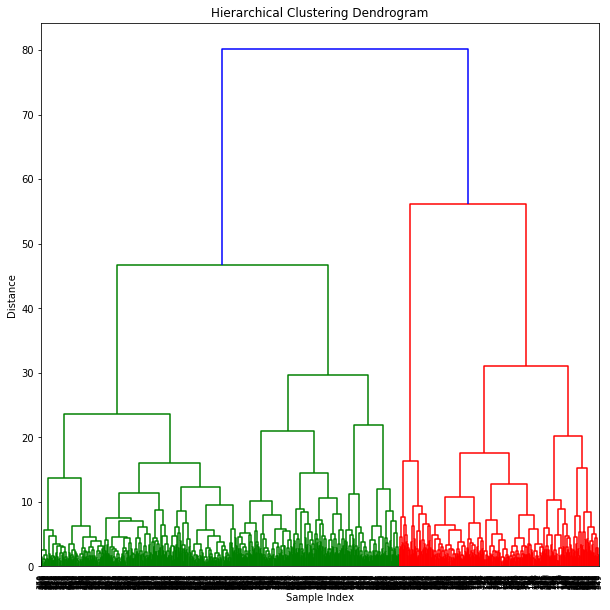

In [34]:
plt.figure(figsize=(10, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(hierarchy, leaf_rotation=90, leaf_font_size=8)

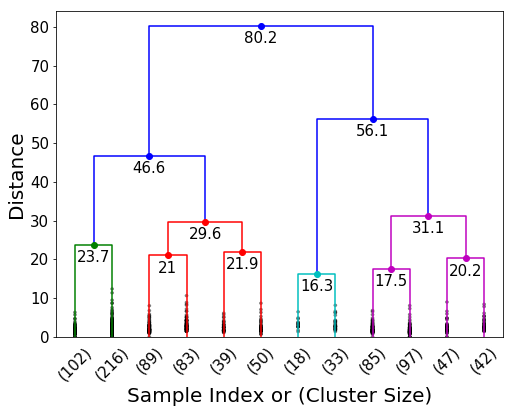

In [123]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.xlabel('Sample Index or (Cluster Size)',fontsize=20)
        plt.ylabel('Distance',fontsize=20)
        plt.xticks(fontsize=15,rotation=45)
        plt.yticks(fontsize=15)
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5), textcoords='offset points', fontsize=15, va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

plt.figure(figsize=(8, 6))
fancy_dendrogram(hierarchy, truncate_mode='lastp', p=12, leaf_rotation=90., 
                 leaf_font_size=12., show_contracted=True, color_threshold = 40, annotate_above=10)
plt.savefig('panss_p_n_hierarchy_dendrogram.png', dpi=300)

In [44]:
from scipy.cluster.hierarchy import fcluster
max_d = 40
hierarchy_labels = fcluster(hierarchy, max_d, criterion='distance')
Counter(hierarchy_labels)

Counter({1: 318, 2: 261, 3: 51, 4: 271})

In [71]:
panss_p_n_imputed_with_label['hierarchy_label']=hierarchy_labels
print panss_p_n_imputed_with_label.loc[panss_p_n_imputed_with_label['hierarchy_label'] == 1].mean()
print panss_p_n_imputed_with_label.loc[panss_p_n_imputed_with_label['hierarchy_label'] == 2].mean()
print panss_p_n_imputed_with_label.loc[panss_p_n_imputed_with_label['hierarchy_label'] == 3].mean()
print panss_p_n_imputed_with_label.loc[panss_p_n_imputed_with_label['hierarchy_label'] == 4].mean()

panss_p1           2.591195
panss_p2           2.261006
panss_p3           1.628931
panss_p4           1.773585
panss_p5           1.600629
panss_p6           2.471698
panss_p7           1.861635
panss_n1           1.946541
panss_n2           1.933962
panss_n3           2.106918
panss_n4           2.009434
panss_n5           1.839623
panss_n6           1.773585
panss_n7           1.588050
kmeans_label       2.720126
hierarchy_label    1.000000
dtype: float64
panss_p1           4.655172
panss_p2           3.800766
panss_p3           3.750958
panss_p4           3.049808
panss_p5           2.417625
panss_p6           4.613027
panss_p7           3.321839
panss_n1           2.440613
panss_n2           2.444444
panss_n3           2.731801
panss_n4           2.582375
panss_n5           2.413793
panss_n6           2.413793
panss_n7           2.065134
kmeans_label       1.000000
hierarchy_label    2.000000
dtype: float64
panss_p1           6.333333
panss_p2           5.411765
panss_p3          

In [72]:
panss_p_n_imputed_with_label.to_csv('panss_p_n_kmeans_and_hierarchy.csv')

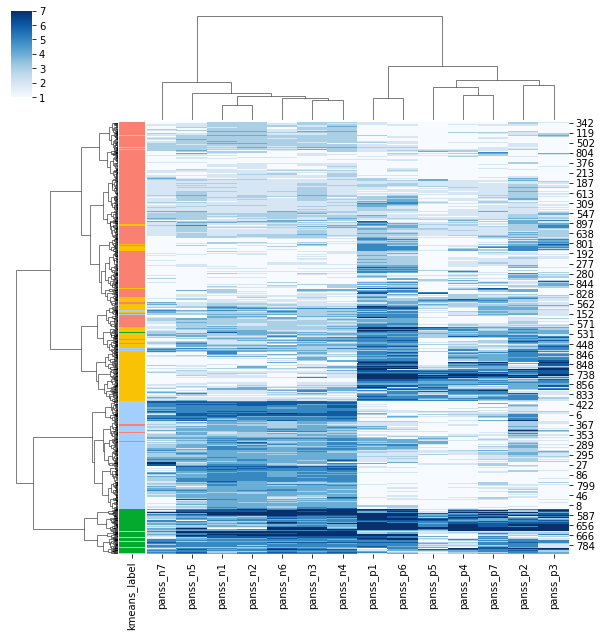

In [102]:
lut = dict(zip([0,1,2,3],['#fac205','#a2cffe','#02ab2e','salmon']))
row_colors = panss_p_n_imputed_with_label.pop('kmeans_label').map(lut)
panss_p_n_imputed_with_label['kmeans_label'] = cluster_labels

sns.clustermap(data=pd.DataFrame(panss_p_n_imputed, columns=panss_p_n.columns), 
               cmap='Blues', method='ward', row_cluster=True, row_colors=row_colors)
plt.savefig('panss_p_n_hierarchy.png',dpi=300)

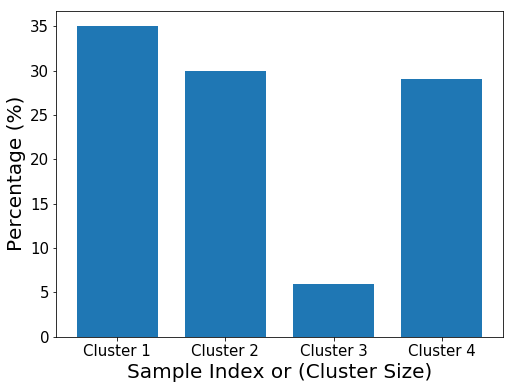

In [124]:
plt.figure(figsize=(8, 6))
plt.bar([1,3,5,7],[35,30,6,29], width=1.5)
plt.xticks([1,3,5,7],['Cluster 1','Cluster 2','Cluster 3', 'Cluster 4'])
plt.ylabel('Percentage (%)',fontsize=20)
plt.xlabel('Sample Index or (Cluster Size)',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('panss_p_n_hierarchy_percentage.png',dpi=300)

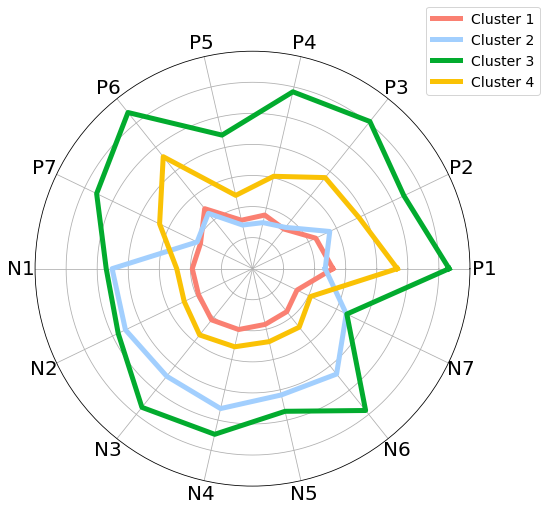

In [4]:
from math import pi
%matplotlib inline
import matplotlib.pyplot as plt

cluster_1 = [2.59, 2.26, 1.63, 1.77, 1.60, 2.47, 1.86, 1.94, 1.93, 2.11, 2.01, 1.84, 1.77, 1.59, 2.59]

cluster_2 = [2.34, 2.76, 1.70, 1.52, 1.44, 2.28, 1.98, 4.52, 4.54, 4.43, 4.62, 4.17, 4.34, 3.35, 2.34]

cluster_3 = [6.33, 5.41, 6.06, 5.84, 4.41, 6.43, 5.57, 4.71, 4.80, 5.71, 5.47, 4.71, 5.84, 3.37, 6.33]

cluster_4 = [4.66, 3.80, 3.75, 3.05, 2.42, 4.61, 3.32, 2.44, 2.44, 2.73, 2.58, 2.41, 2.41, 2.07, 4.66]

N=14

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

golden = '#fac205'
blue = '#a2cffe'
red = 'salmon'
green = '#02ab2e'

plt.figure(figsize=(10,8))
ax1=plt.subplot(111, polar=True)
ax1.set_rlabel_position(0)
line_1 = ax1.plot(angles, cluster_1, linewidth=5, color=red)
line_2 = ax1.plot(angles, cluster_2, linewidth=5, color=blue)
line_3 = ax1.plot(angles, cluster_3, linewidth=5, color=green)
line_4 = ax1.plot(angles, cluster_4, linewidth=5, color=golden)
plt.xticks(angles[:-1], ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 
                         'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7'], color='black', size=20)
plt.legend((line_1[0],line_2[0],line_3[0], line_4[0]),
           ('Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'), loc=(0.9,0.9), fontsize=14)
plt.yticks([1,2,3,4,5,6], ['','','','','',''], color="grey", size=13)

plt.ylim(0,7)

plt.savefig('panss_p_n_hierarchy_radar_chart.png',dpi=300)